In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


In [4]:
print("head \n",df_train.head())
print("info \n" ,df_train.info())
print("describe \n", df_train.describe())
print("columns \n", df_train.columns)
print("shape \n", df_train.shape)
print("missing values \n", df_train.isnull().sum())
print("unique values \n", df_train.nunique())

head 
    id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1                       0    

In [5]:
df_train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

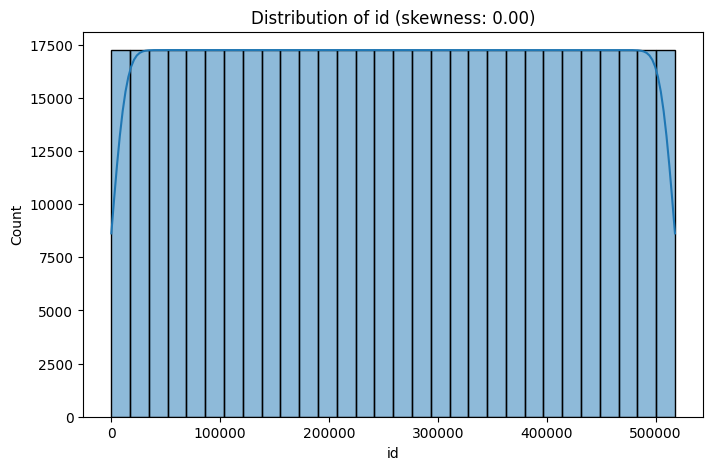

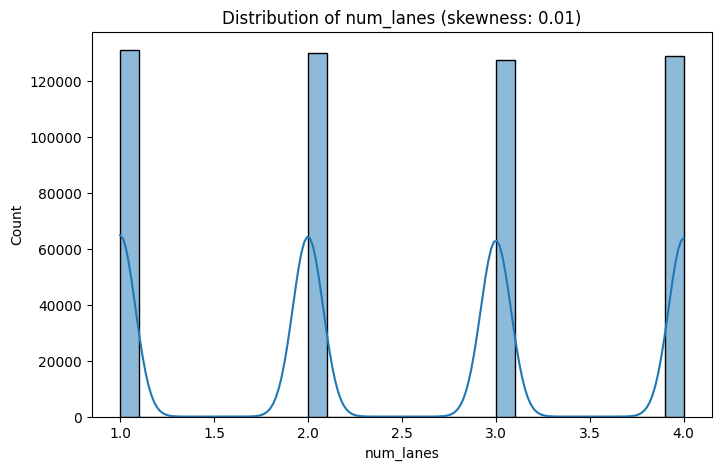

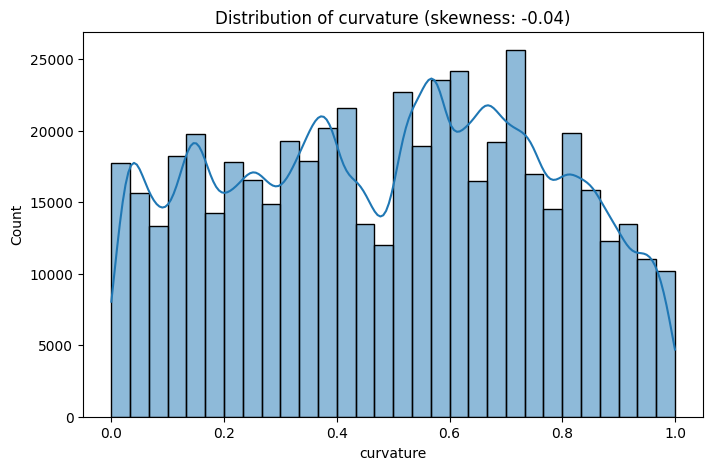

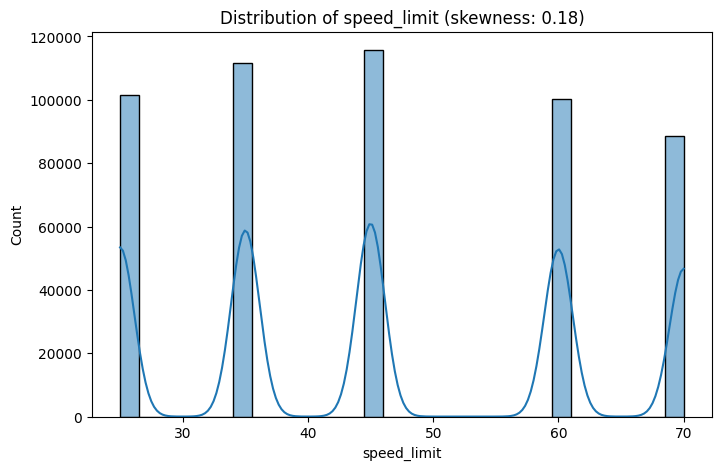

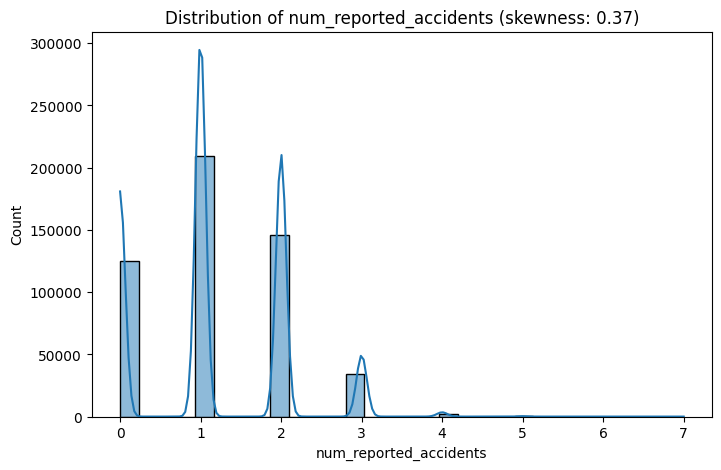

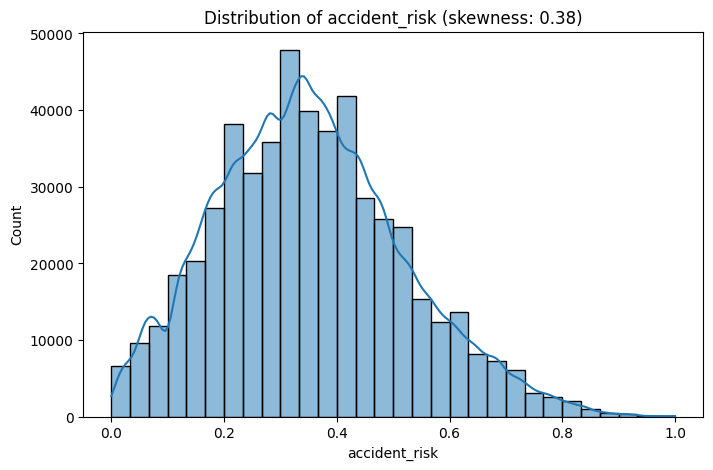

In [6]:
# Select only numeric columns
numeric_cols = df_train.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (skewness: {df_train[col].skew():.2f})")
    plt.show()

In [23]:
df_train.drop(df_train["id"],inplace=True)

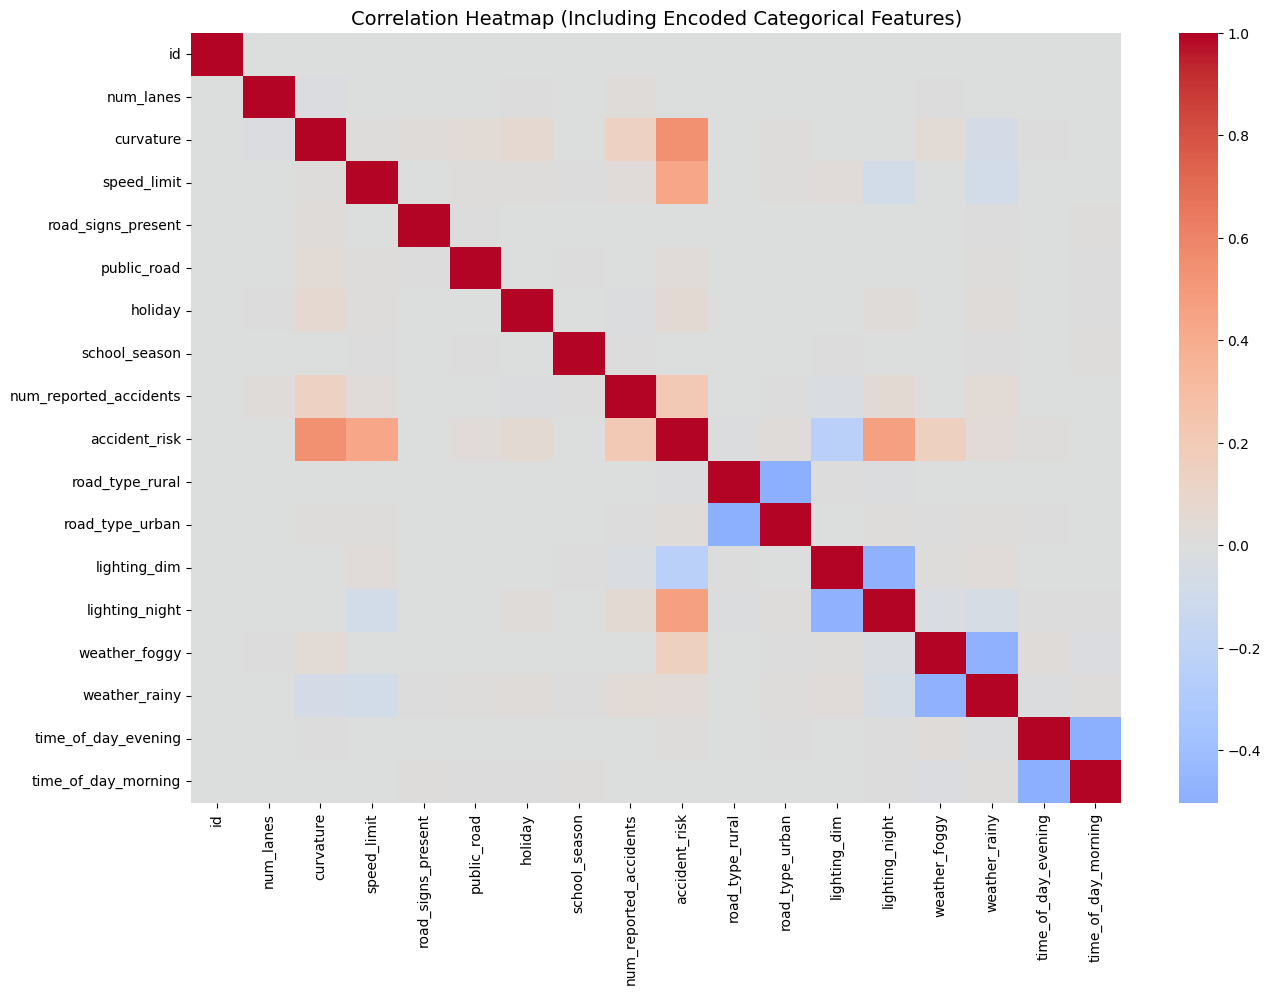

In [9]:
df_encoded = pd.get_dummies(df_train, drop_first=True)
corr = df_encoded.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Including Encoded Categorical Features)", fontsize=14)
plt.show()


C:\Users\ashis\AppData\Local\Temp\ipykernel_32424\3841178672.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')


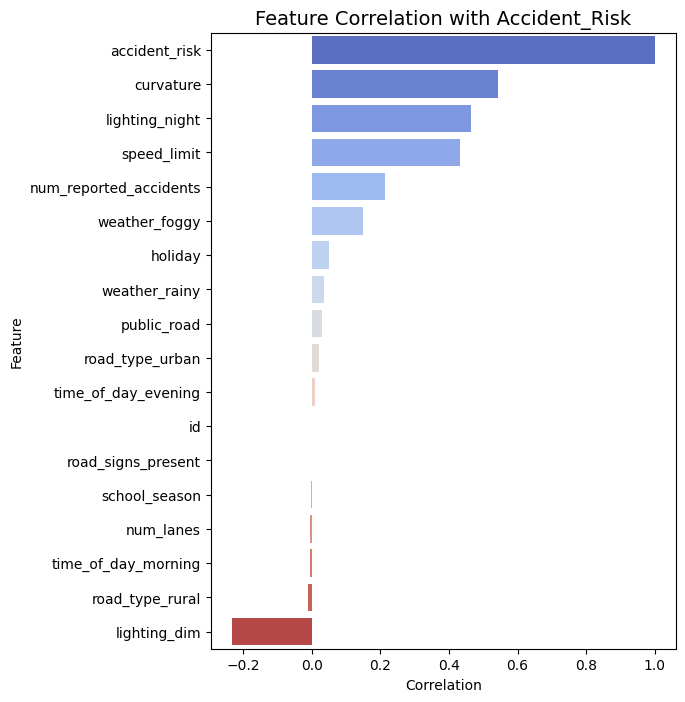

In [11]:
corr_with_target = corr['accident_risk'].sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
plt.title("Feature Correlation with Accident_Risk", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()


In [13]:
target = df_train["accident_risk"]

In [16]:
X_train = df_train.drop(columns=["accident_risk"])
y_train = target

In [17]:
x_test = df_test.copy()

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,random_state=56)


In [19]:
model.fit(X_train,y_train)


ValueError: could not convert string to float: 'urban'